In [15]:
import heapq
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))

def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (-f(xm) * rect[1], rect)
    

def get_max_elem(lst, key=None):
    """Find and remove the maximum element from the list.
    
    Find the max element (according to the parameter `key`, which is a callable),
    remove it from the list, and return both the element and the rest.
    """
    if key is None:
        # use the identity function
        key = lambda x: x
    
    # find the max element
    elem = max(lst, key=key)
    
    # find its position in the list
    idx = lst.index(elem)
    
    return elem, lst[:idx] + lst[idx+1:]

    
def adapt_rect_list(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst, lambda x: -x[0])
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
        
    # collect the answer
    return -sum(w for w, r in lst)

In [4]:
def adapt_rect_heapq(f, a, b, npts):
    hp = []

    # start from a single rectangle
    item = make_rect(a, b, f)
    heapq.heappush(hp, item)
    
    # loop
    for _ in range(npts):
        # get the largest one
        w, (start, width) = heapq.heappop(hp)
        
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        heapq.heappush(hp, rect1)
        heapq.heappush(hp, rect2)
    
    # collect the answer
    return -sum(w for w, r in hp)

In [10]:
def crect(f, a, b, npts):
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

In [134]:
def comp(f,exact):
    err1=[]
    err2=[]
    err3=[]
    hh = []
    for n in range(5,50,5):
        hh.append(n)
        err1.append(abs((adapt_rect_list(f, a, b, n))[0]-exact))
        err2.append(abs((adapt_rect_heapq(f, a, b, n))[0]-exact))
        err3.append(abs((crect(f,a,b,n))-exact))
        aa.append(abs((adapt_rect_list(f, a, b, n))[0]-(adapt_rect_heapq(f, a, b, n))[0]))
    plt.plot(hh, err1, label='Адаптивный алгоритм')
    plt.plot(hh, err2, label='Адаптивный алгоритм с heapq')
    plt.plot(hh, err3, label='Метод средних прямоугольников с равномерной сеткой')
    plt.legend()
    plt.ylabel('Ошибка')
    plt.xlabel('n')
    print(' Средняя разница в ошибке обычного адаптивного алгоритма и адаптивного алгоритма с heapq',np.mean(aa))

In [135]:
def f(x):
    return ( np.exp(-x))

In [136]:
a, b = 0, 20

In [137]:
def ex(f,a,b):
    return (-np.exp(-b) + np.exp(-a))
exact=ex(f,a,b)

Cходимость алгоритмов при интегрирование функции $e^{-x}$.
Стоит отметить, что адаптивный алгоритм с heapq и обычный дают примерно одинаковые результат и их отличие крайне мало, из-за чего на графиках они сливаются в одну кривую

<IPython.core.display.Javascript object>


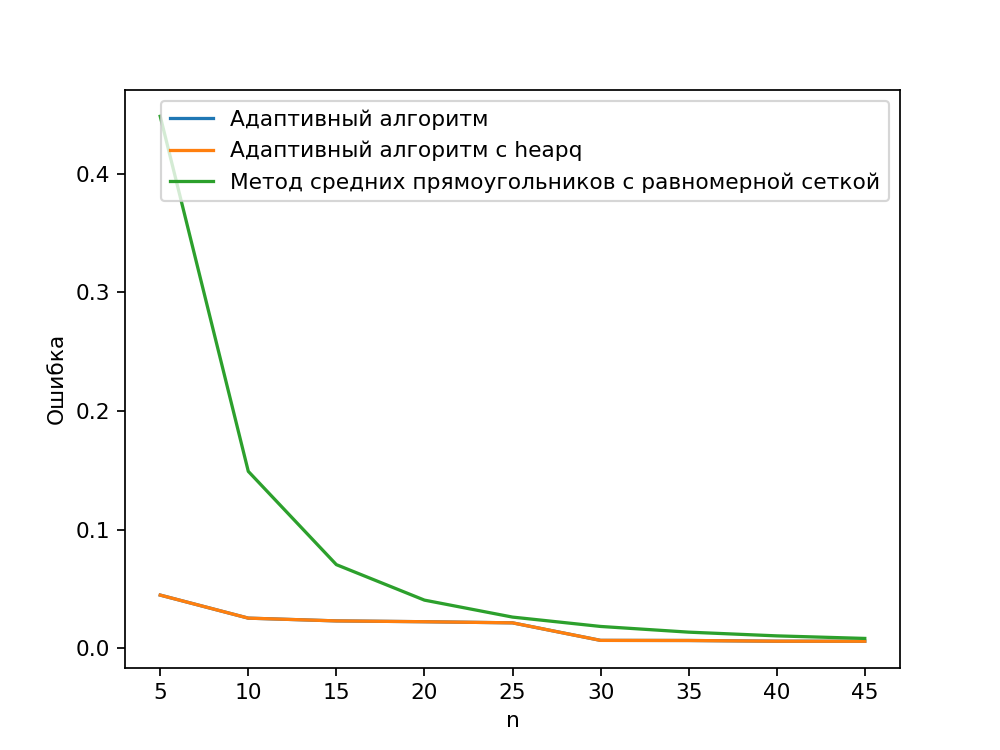

 Средняя разница в ошибке обычного адаптивного алгоритма и адаптивного алгоритма с heapq 8.916313925449945e-16


In [138]:
comp(f, exact)

In [123]:
def g(x):
    return (x**8 / np.sqrt(1 - x**2))

In [124]:
a,b=-1, 1
exact1=quad(g, a, b)[0]

Cходимость алгоритмов при интегрирование функции $ \frac {x^8}{\sqrt{1 - x^2}}$
Адаптивный алгоритм даёт более точный результат только на определённой итерации, что видно на резком "падение" графика

<IPython.core.display.Javascript object>


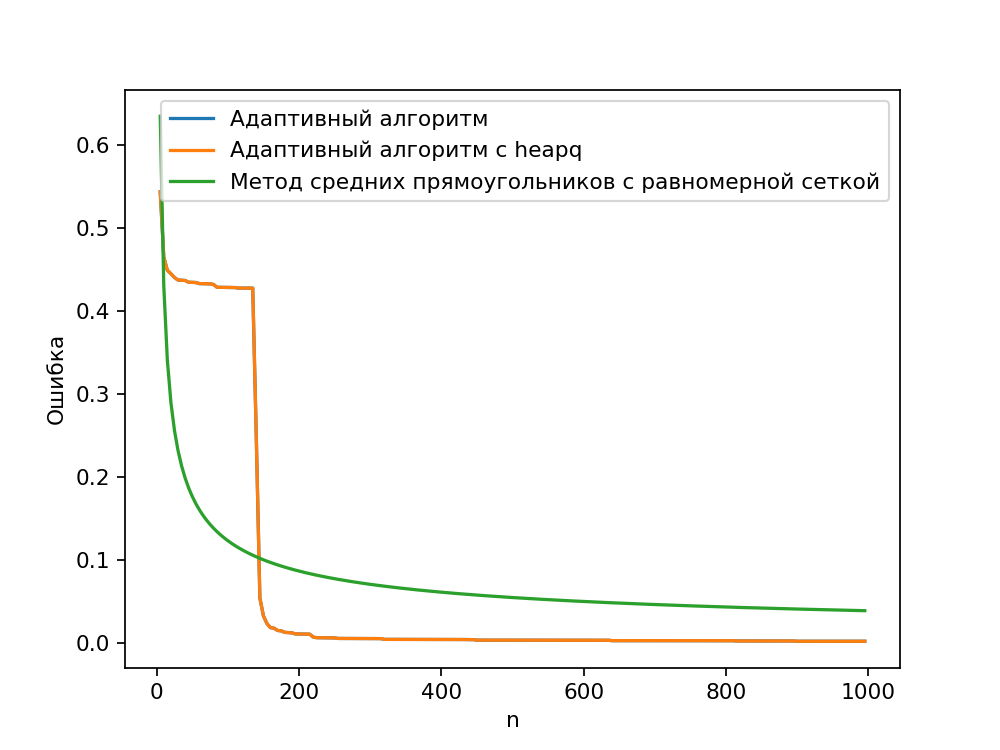

 Средняя разница в ошибке обычного адаптивного алгоритма и адаптивного алгоритма с heapq 8.632486772046385e-16


In [127]:
comp(g, exact1)